In [1]:
import numpy as np
import pdb
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

def chd(tss1, tss2):
    #pdb.set_trace()
    return np.sum(np.min(np.square(tss1-tss2.transpose()),axis=0))


tss  = np.load('tss1_np.npy')

#     print(tss.shape)
#     tss[np.isnan(tss)]=0
#     dist = np.zeros((255,255))
#     for i in range(255):
#         for j in range(255):
#             dist[i,j]=chd(tss[i:i+1], tss[j:j+1])
#             # nbrs = NearestNeighbors(n_neighbors=1).fit(tss[i:i+1].transpose())
#             # distances, _ = nbrs.kneighbors(tss[j:j+1].transpose())
#             # dist[i,j]=np.sum(np.abs(distances))
tss_bin = np.load('tss1_binary.npy')



In [2]:
tss_bin.shape

(255, 2325200)

In [3]:
tss.shape

(255, 159086)

In [4]:
activity_summary = []
plt.rcParams['figure.figsize'] = [10, 5]
per_neuron_activity = np.zeros([255,2325])
i=0
j=0
while i+1000 < tss_bin.shape[1]:
    arr_slice = tss_bin[:,i:i+1000]
    activity_summary.append(np.sum(arr_slice))
    per_neuron_activity[:,j]  = np.sum(arr_slice,axis=1)
    j+=1
    
    i+=1000
act_array= np.array(activity_summary)

In [5]:
act_array.shape
per_neuron_activity.shape

(255, 2325)

In [6]:
from matplotlib import pyplot as plt

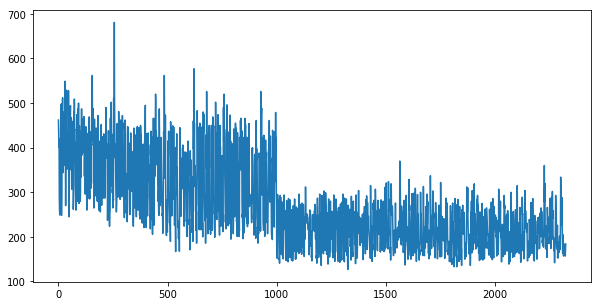

In [7]:
plt.plot(act_array)
plt.show()


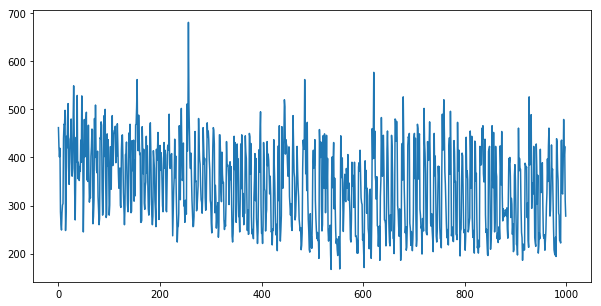

In [8]:
act_array.shape
plt.plot(act_array[:1000])
plt.show()

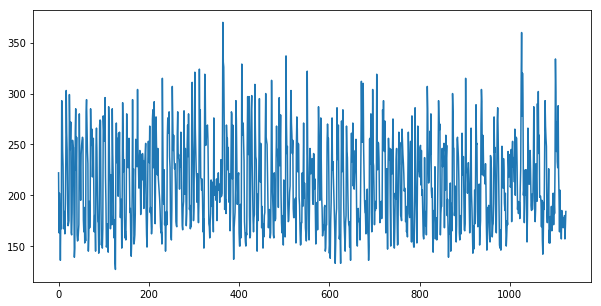

In [9]:
act_array.shape
plt.plot(act_array[1200:])
plt.show()

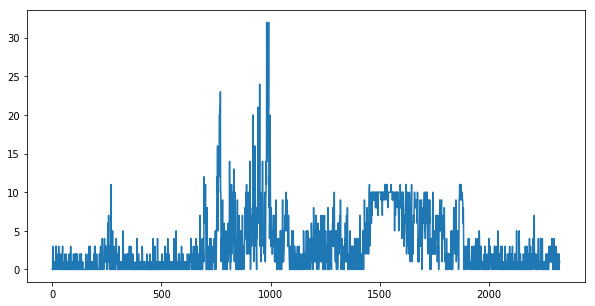

In [10]:
plt.plot(np.sum(per_neuron_activity[6:10,:],axis=0))

In [11]:
corr = np.corrcoef(per_neuron_activity)

In [12]:
corr.shape


(255, 255)

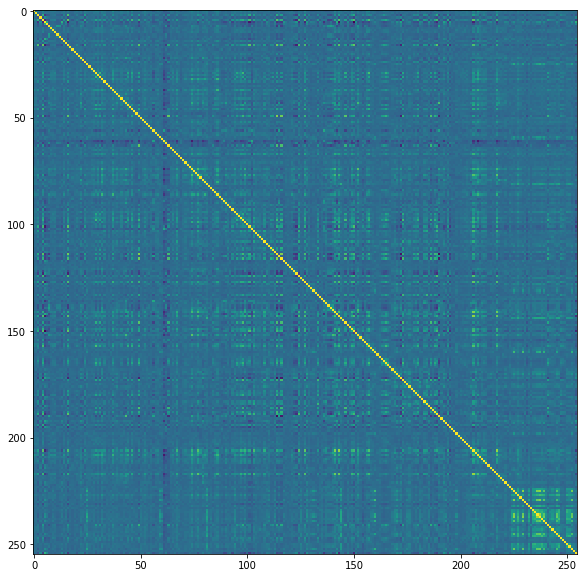

In [13]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(corr)

In [14]:
sums = np.sum(tss_bin,axis=1)
np.max(sums)

36121

In [15]:
reaches_start = np.load('reachStart1_np.npy')

In [16]:
reaches_start.shape

(164,)

In [17]:
reaches_start[163]

2228400.0

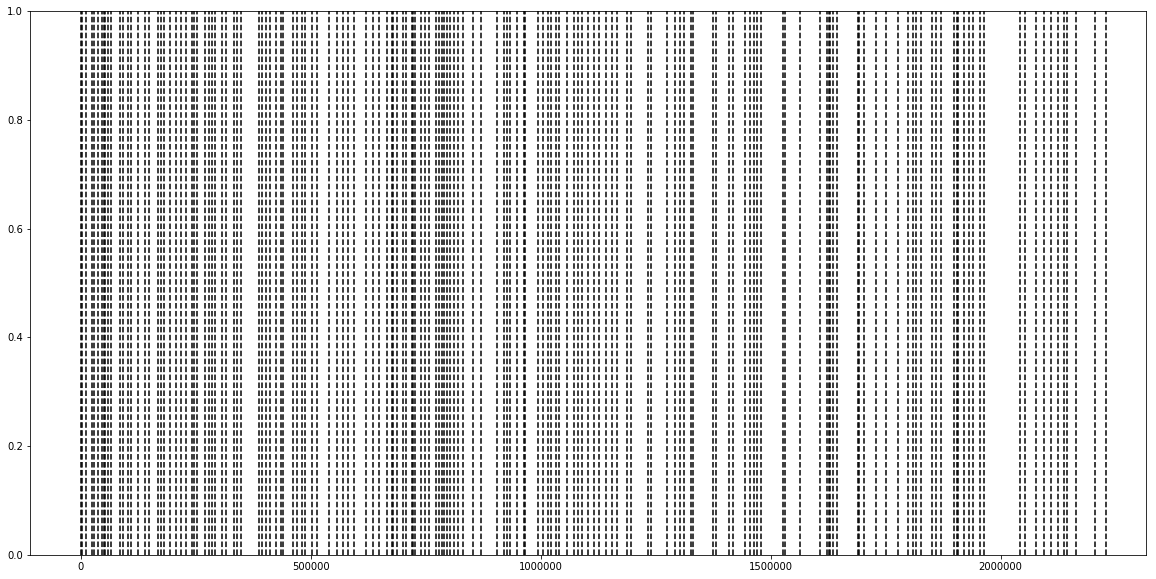

In [18]:
for xc in reaches_start:
    plt.axvline(x=xc, color='k', linestyle='--')

In [19]:
rews= np.load('rewTime1_np.npy')

In [20]:
rews.shape

(217,)

In [21]:
reach_50  = reaches_start[reaches_start < 500000]


In [22]:
reach_50  = reach_50/1000

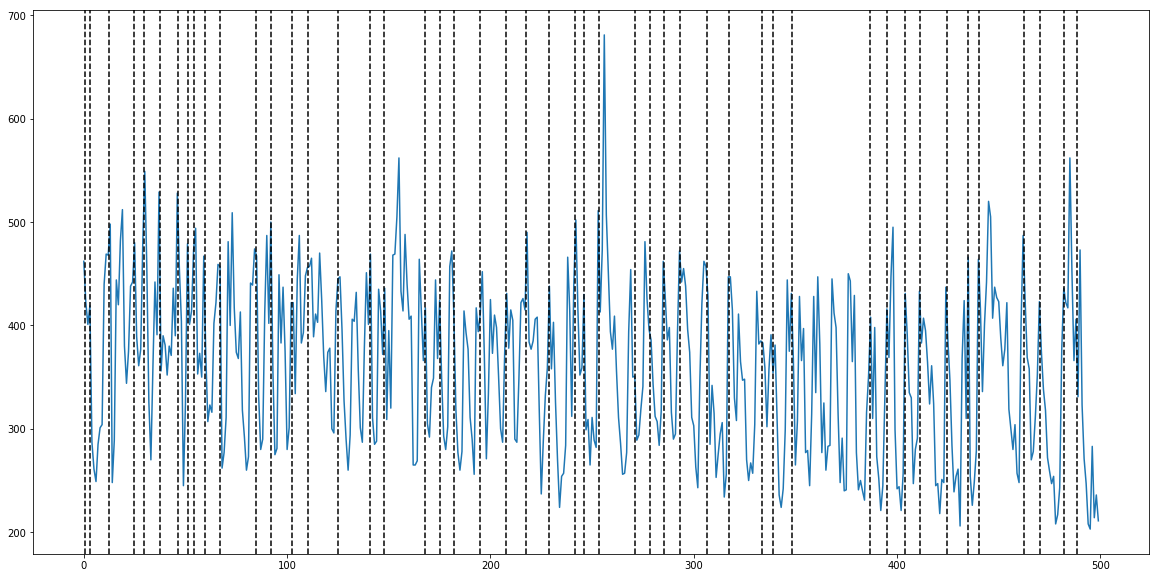

In [23]:
plt.plot(act_array[:500])
for xc in reach_50:
    plt.axvline(x=xc, color='k', linestyle='--')

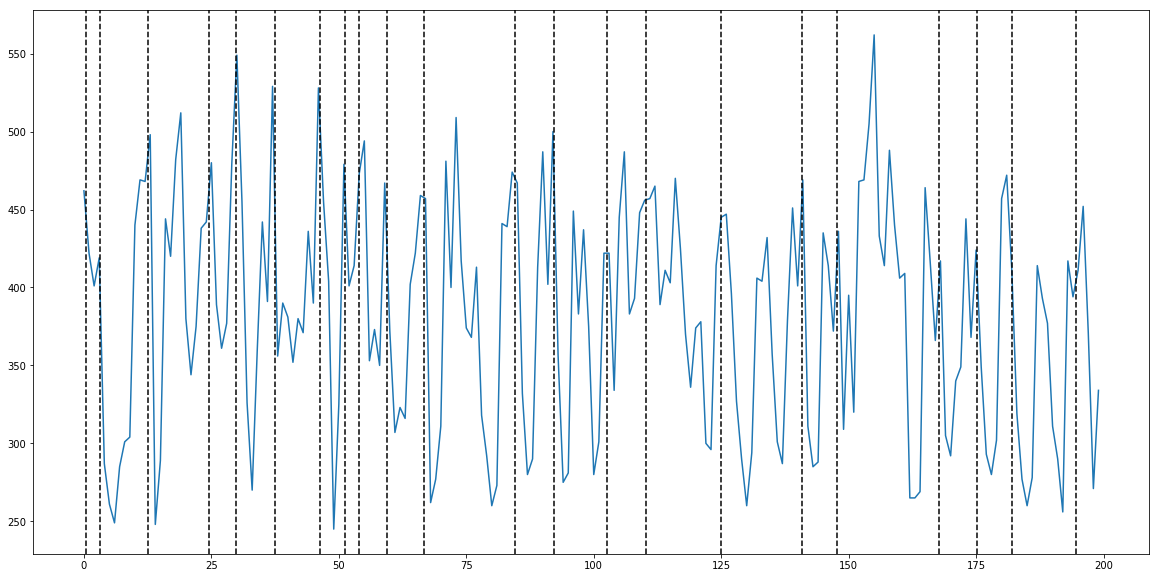

In [24]:
reach_20  = reaches_start[reaches_start < 200000]/1000
plt.plot(act_array[:200])
for xc in reach_20:
    plt.axvline(x=xc, color='k', linestyle='--')

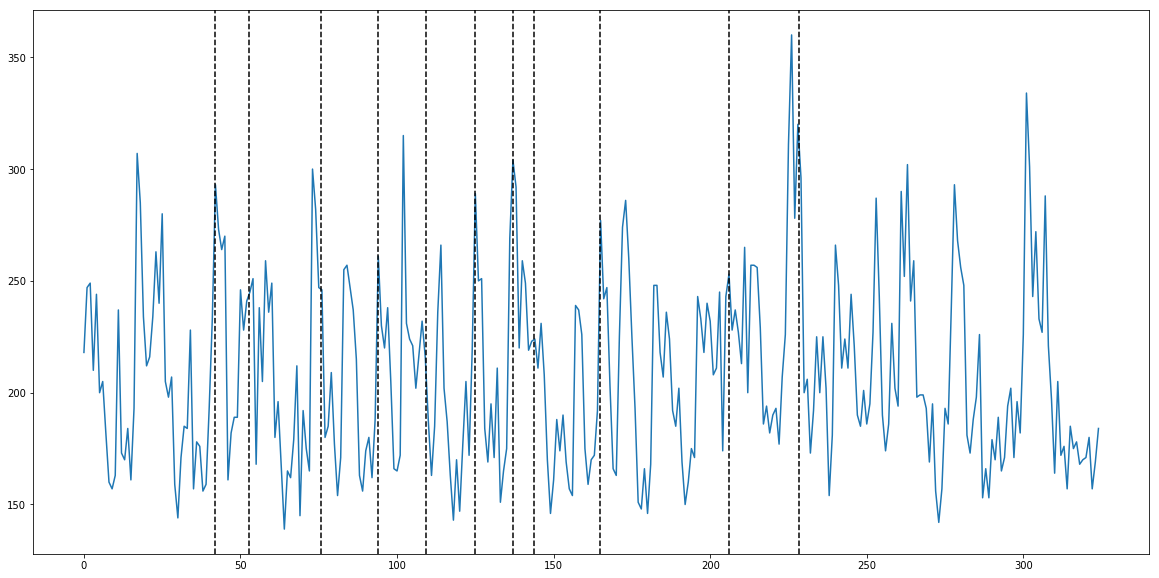

In [25]:
reach_2mil_greater  = reaches_start[reaches_start > 2000000]/1000 - 2000
plt.plot(act_array[2000:])
for xc in reach_2mil_greater:
    plt.axvline(x=xc, color='k', linestyle='--')

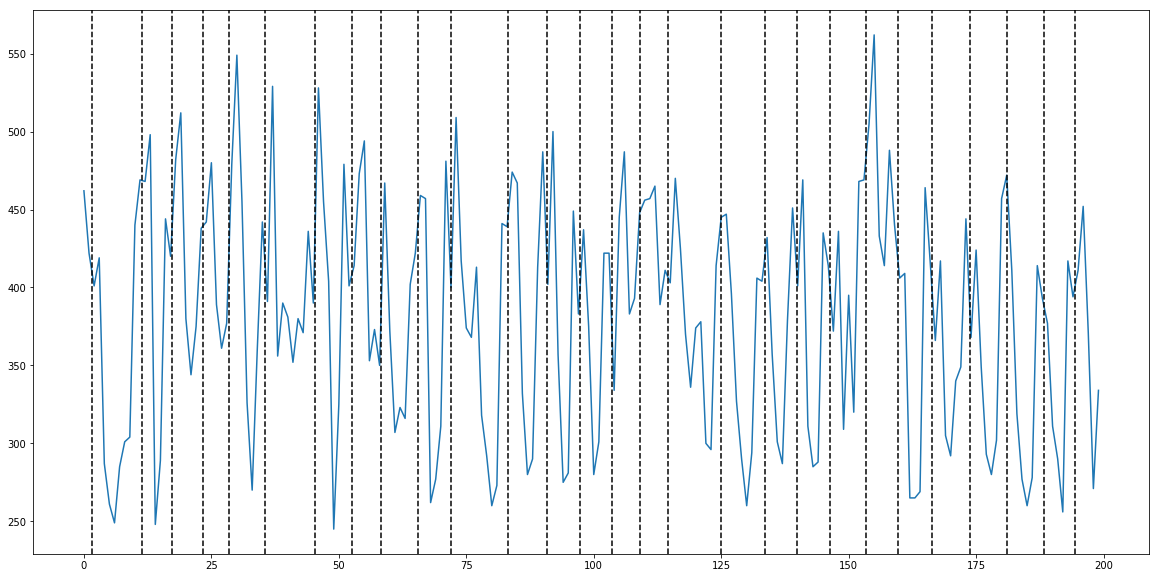

In [26]:
rews_20  = rews[rews < 200000]/1000
plt.plot(act_array[:200])
for xc in rews_20:
    plt.axvline(x=xc, color='k', linestyle='--')

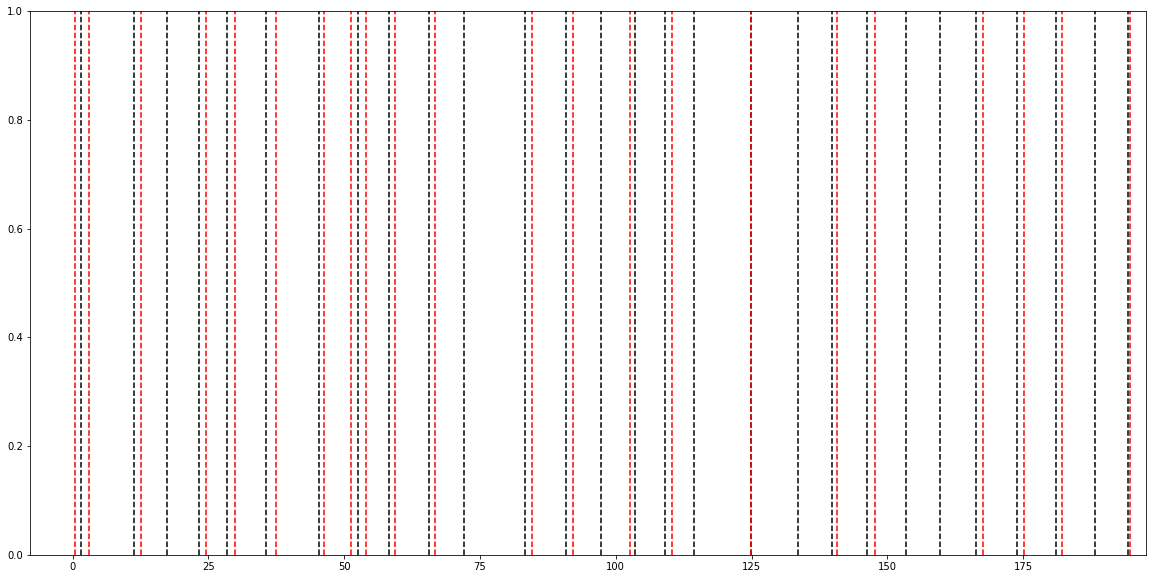

In [27]:
rews_20  = rews[rews < 200000]/1000
# plt.plot(act_array[:200])
for xc in rews_20:
    plt.axvline(x=xc, color='k', linestyle='--')
for xc in reach_20:
    plt.axvline(x=xc, color='r', linestyle='--')

In [28]:

x_data = np.load('Bin100X.npy')
y_data = np.load('Bin100_y_leading_to_reach.npy')


In [29]:
x_data.shape
y_data.shape

(23251,)

In [30]:
from sklearn.svm import SVC
clf = SVC(cache_size=2000, class_weight='balanced')
X = x_data.T
clf.fit(X, y_data)
y_preds = clf.predict(X)


In [31]:
clf.score(x_data.T, y_data)

0.7339899359167348

In [ ]:
X = x_data.T

In [ ]:
# y_preds = clf.predict(X)

In [ ]:
np.sum(y_preds)

In [ ]:
X[1:10,1:10]

In [ ]:
# clf2 = SVC(cache_size=2000, class_weight='balanced')

In [ ]:
# clf2.fit(x_data.T[:10000,:], y_data[:10000])

In [ ]:
# y_preds = clf.predict(X[:10000,:])

In [ ]:
np.sum(y_preds)

In [ ]:
# clf2.score(x_data.T, y_data)

In [ ]:
# sample_scores = y_data*6.0 + 1.0
# clf2.score(x_data.T, y_data,sample_weight=sample_scores)

In [ ]:
def print_metrics(Y, y_pred):
  tp = ((Y==y_pred)*(Y==1)).sum()
  fp = ((Y!=y_pred)*(y_pred==1)).sum()
  fn = ((y_pred==0)*(Y==1)).sum()
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1_score = 2 * precision * recall / (precision + recall)
  accuracy = np.sum(y_pred == Y)/len(Y)
  #pdb.set_trace()
  print('Precision: %4f' %(precision))
  print('Recall: %4f' %(recall))
  print('f1_score: %4f' %(f1_score))
  print('accuracy: %4f' %(accuracy))

In [ ]:
Y = y_data

In [ ]:
print_metrics(Y[:10000],y_preds)

In [ ]:
X.shape

In [ ]:

X.dtype


In [ ]:
X_copy = X.copy().astype('float64')
i=0
while i < X.shape[0]:
    factor = np.sum(X_copy[i:i+100,:])/100.0
    X_copy[i:i+100,:] =X_copy[i:i+100,:]/ factor
    i+=100
X_copy[-51:,:] = X_copy[-51:,:] /factor

arr_data = np.sum(X_copy,axis=1)
plt.plot(arr_data)


In [ ]:
np.max(X_copy)

In [ ]:
X = X_copy

In [ ]:
X_normalized = X.copy()

In [ ]:
from scipy.fftpack import fft
N = 23251
yf = fft(X_normalized)

In [ ]:
print(yf.shape)
plt.plot(np.abs(yf[:,0]))

In [ ]:
corr_fft = np.corrcoef(yf.real.T)

corr_fft.shape
print(yf.dtype)

In [ ]:
plt.imshow(abs(corr_fft))

In [ ]:
per_neuron_activity.shape
yf = fft(per_neuron_activity)

In [ ]:
yf.shape


In [ ]:

corr_fft = np.corrcoef(yf.real)
plt.imshow(corr_fft)

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(per_neuron_activity)

In [38]:
kmeans.labels_

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)

In [67]:
principalComponents = pca.fit_transform(per_neuron_activity)

In [ ]:
principalComponents.shape

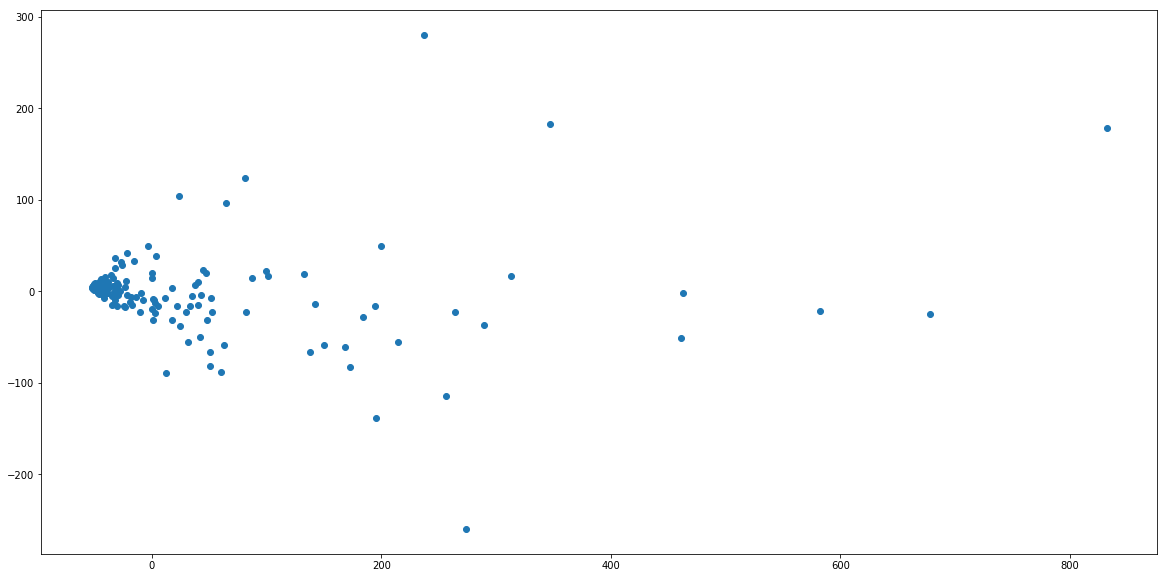

In [69]:
plt.scatter(principalComponents[:,0],principalComponents[:,1])

In [ ]:
plt.scatter(principalComponents[:100,0],principalComponents[:100,1])

In [ ]:
pnn = per_neuron_activity.copy()
np.mean(per_neuron_activity)
plt.plot(per_neuron_activity)

In [ ]:
per_neuron_activity.shape

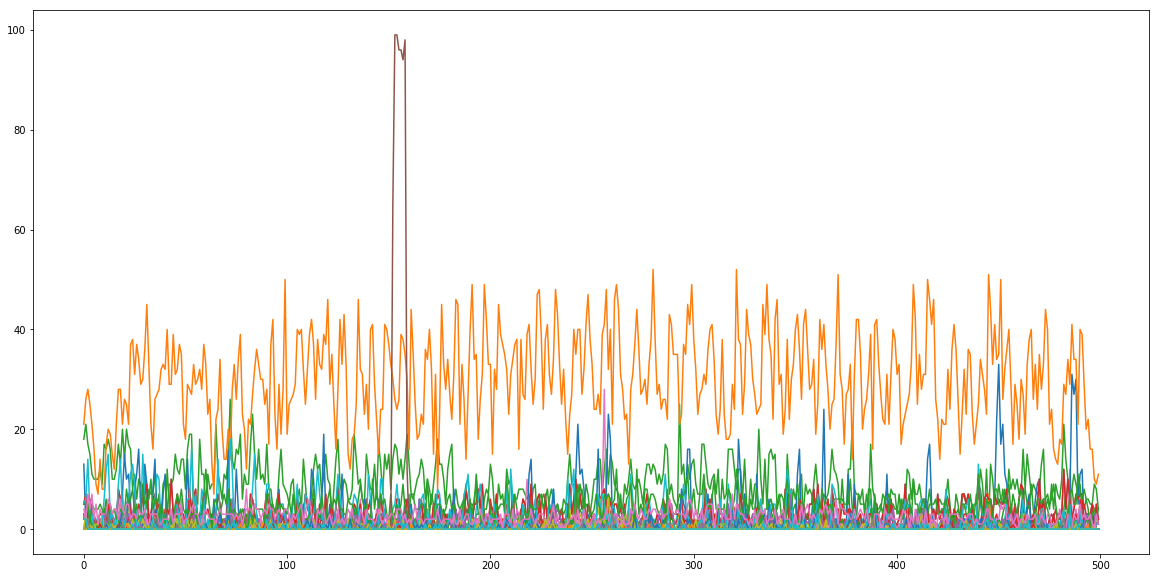

In [42]:
rand_sampl = np.random.randint(255,size = 50)

for i in rand_sampl:
    plt.plot(per_neuron_activity[i,:500])
    
plt.show()

In [46]:
pnn_norm = per_neuron_activity/np.max(per_neuron_activity,axis =1)[:,None]

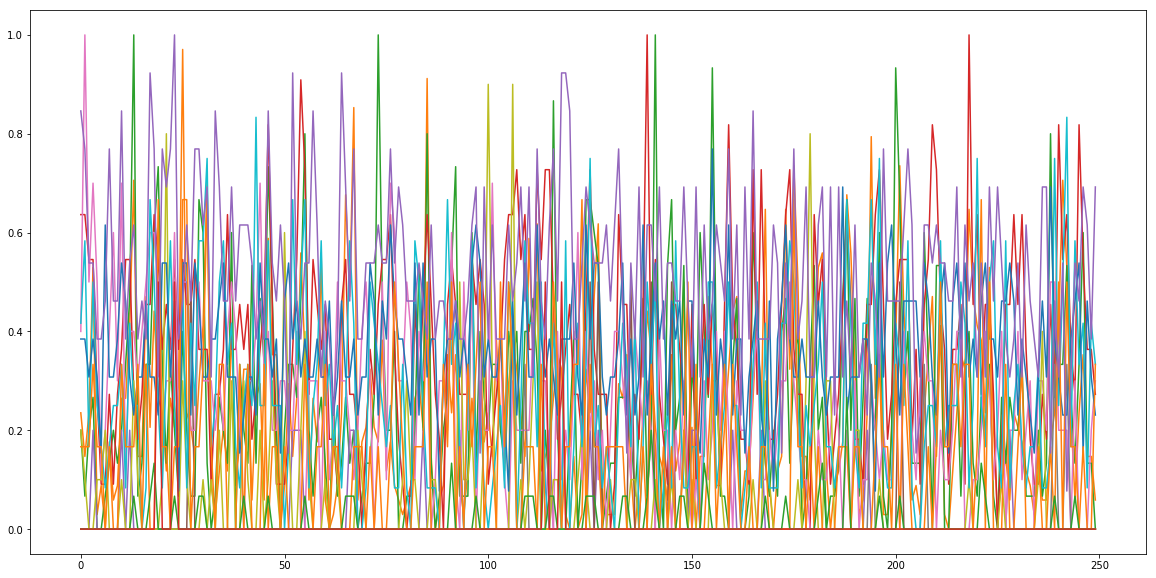

In [79]:
rand_sampl = np.random.randint(255,size = 10)

for i in range(140,155):
    plt.plot(pnn_norm[i,:250])
    
plt.show()

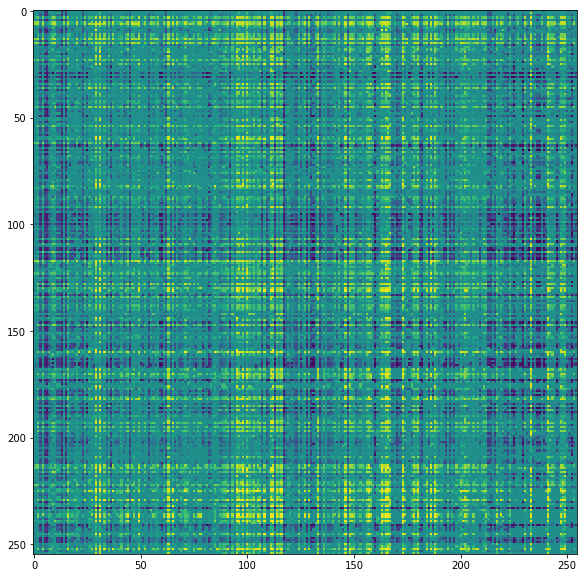

In [55]:
cross_corrs = np.zeros([255,255])
from scipy import signal, fftpack
for i in range(255):
    for j in range(255):
       cross_corrs[i,j] =  np.argmax(signal.correlate(pnn_norm[i,:],pnn_norm[j,:]))

plt.imshow(cross_corrs)

In [58]:
np.argmax(signal.correlate(pnn_norm[0,:],pnn_norm[4,:]))

2324

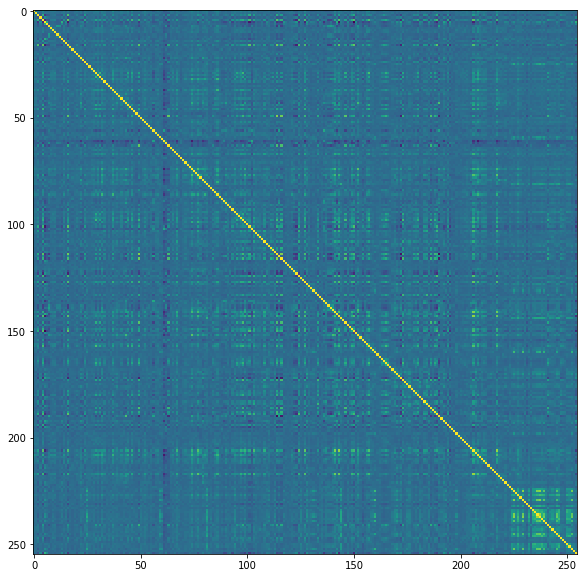

In [63]:
corr_norm = np.corrcoef(pnn_norm)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(corr_norm)

In [71]:
pnn_norm.shape

(255, 2325)

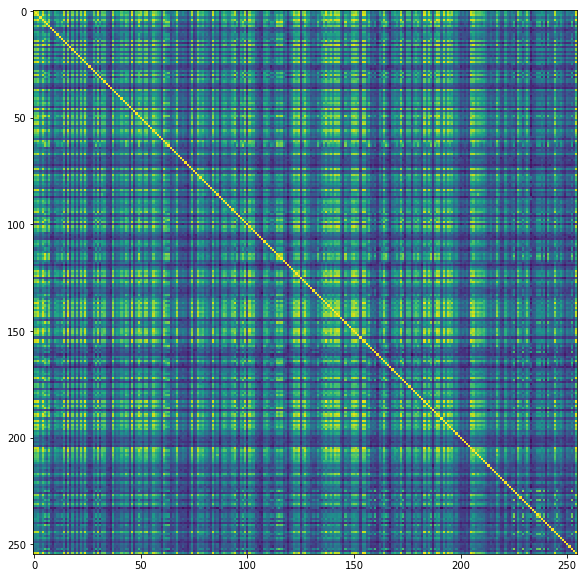

In [72]:
ffts = np.zeros_like(pnn_norm)
from numpy.fft import fft
for i in range(255):
    ffts[i,:] = np.absolute(fft(pnn_norm[i,:]))

corr_norm = np.corrcoef(ffts)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(corr_norm)

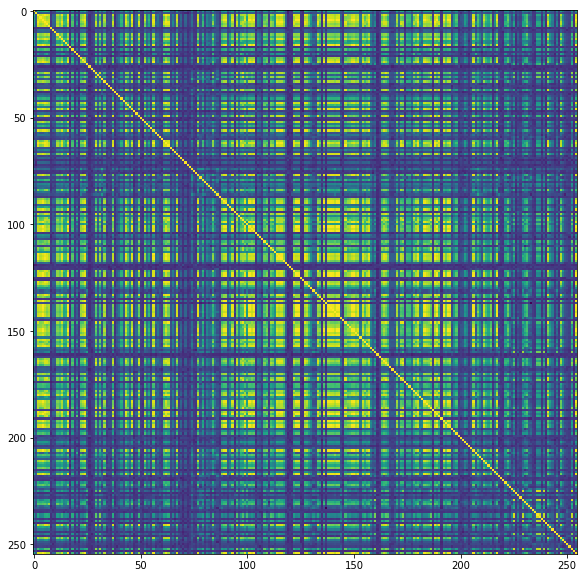

In [78]:
from scipy import signal
pgrams = np.zeros([255,1163])
from numpy.fft import fft
for i in range(255):
    pgrams[i,:] = np.absolute(signal.periodogram(pnn_norm[i,:])[1])

corr_norm = np.corrcoef(pgrams)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(corr_norm)

In [75]:
signal.periodogram(pnn_norm[i,:])

(array([0.00000000e+00, 4.30107527e-04, 8.60215054e-04, ...,
        4.98924731e-01, 4.99354839e-01, 4.99784946e-01]),
 array([1.16123718e-31, 1.18116244e+00, 7.92884267e-01, ...,
        4.38916113e-02, 3.50832749e-02, 1.43083918e-02]))